In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data/Real_Estate_Sales_2001-2020_GL.csv')
df.head()

C:\Users\huber\AppData\Local\Temp\ipykernel_13468\1008872696.py:1: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/Real_Estate_Sales_2001-2020_GL.csv')


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
2,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN
4,200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.5957,Residential,Single Family,NaN,NaN,NaN,NaN


In [3]:
df['Date Recorded'] = pd.to_datetime(df['Date Recorded'])

In [4]:
print(f'dtypes:\n{df.dtypes}')
print('_'*15)
print(f'Stats:\n {df.describe()}')
print('_'*15)
print(f'Null values:\n{df.isnull().sum()}')
print('_'*15)
print(f'Duplicated values: {df.duplicated().sum()}')
print('_'*15)
print(f'Shape:{df.shape}')

dtypes:
Serial Number                int64
List Year                    int64
Date Recorded       datetime64[ns]
Town                        object
Address                     object
Assessed Value             float64
Sale Amount                float64
Sales Ratio                float64
Property Type               object
Residential Type            object
Non Use Code                object
Assessor Remarks            object
OPM remarks                 object
Location                    object
dtype: object
_______________
Stats:
        Serial Number      List Year  Assessed Value   Sale Amount  \
count   9.972130e+05  997213.000000    9.972130e+05  9.972130e+05   
mean    4.311864e+05    2010.189829    2.791437e+05  3.911512e+05   
std     6.549219e+06       6.237877    1.670610e+06  5.347270e+06   
min     0.000000e+00    2001.000000    0.000000e+00  0.000000e+00   
25%     3.044400e+04    2004.000000    8.760000e+04  1.400000e+05   
50%     7.030300e+04    2010.000000    1.383900e+0

In [5]:
#List year does not match date recorded, so new list year column will be done based on date rec column so this will be dropped, 
#serial number col is useless so will be dropped as well, all the other dropped columns contain too many N/A

df = df.drop(columns = ['Serial Number', 'List Year', 'Non Use Code', 'Assessor Remarks', 'OPM remarks', 'Location'])

In [6]:
df['List Year'] = pd.DatetimeIndex(df['Date Recorded']).year

In [7]:
df['Property Type'].value_counts() #Property type column looks way more specific, so the residential type column can be dropped

Single Family     401612
Condo             105420
Residential        60728
Two Family         26408
Three Family       12586
Vacant Land         3163
Four Family         2150
Commercial          1981
Apartments           486
Industrial           228
Public Utility         5
Name: Property Type, dtype: int64

In [8]:
df['Residential Type'].value_counts()

Single Family    445016
Condo            117780
Two Family        29609
Three Family      14081
Four Family        2418
Name: Residential Type, dtype: int64

In [10]:
#As the vacant land is not a building it can be dropped as well from the Property Type col
df = df.drop(df[df['Property Type']=='Vacant Land'].index)

In [11]:
#There is only 5 Public Utility properties so these will be dropped as well 
df = df.drop(df[df['Property Type']=='Public Utility'].index)

In [12]:
df = df.drop('Residential Type', axis=1)

In [13]:
df['Address'].nunique() #Adress can be drop as its almost unique value, useless for ML

712375

In [14]:
df = df.drop('Address', axis=1)

In [15]:
df.loc[df['Date Recorded'].isna()] #All columns are blank in date recorded null so this will be dropped

,Date Recorded,Town,Assessed Value,Sale Amount,Sales Ratio,Property Type,List Year
177917,NaT,Orange,0.0,0.0,0.0,NaN,NaN
179410,NaT,Orange,0.0,0.0,0.0,NaN,NaN


In [16]:
df = df.dropna(subset = 'Date Recorded')

In [17]:
df

,Date Recorded,Town,Assessed Value,Sale Amount,Sales Ratio,Property Type,List Year
0,2021-09-13,Ansonia,150500.0,325000.0,0.463000,Commercial,2021.0
1,2020-10-02,Ashford,253000.0,430000.0,0.588300,Residential,2020.0
2,2021-03-09,Avon,130400.0,179900.0,0.724800,Residential,2021.0
3,2021-04-13,Avon,619290.0,890000.0,0.695800,Residential,2021.0
4,2021-07-02,Avon,862330.0,1447500.0,0.595700,Residential,2021.0
...,...,...,...,...,...,...,...
997208,2020-06-24,New London,60410.0,53100.0,1.137665,Single Family,2020.0
997209,2019-11-27,Waterbury,68280.0,76000.0,0.898400,Single Family,2019.0
997210,2020-04-27,Windsor Locks,121450.0,210000.0,0.578300,Single Family,2020.0
997211,2020-06-03,Middletown,203360.0,280000.0,0.726300,Single Family,2020.0


In [182]:
df['Sale Amount'].describe() #Min sale amount is 0 which is not possible - i will drop all the date with sale amount less than a 10000, as this is noise, not extreme value 
#This will not change the mean much, but make model predict better on average, high values are still in as they are considered as extreme value which is valuable 

count    9.840570e+05
mean     3.903043e+05
std      1.889413e+06
min      1.000000e+04
25%      1.430000e+05
50%      2.276000e+05
75%      3.650400e+05
max      3.955000e+08
Name: Sale Amount, dtype: float64

In [19]:
def noise(x):
    if x < 10000:
        x = np.nan
    else:
        return x

In [20]:
df['Sale Amount'] = df['Sale Amount'].apply(noise)

In [21]:
df = df.dropna(subset = 'Sale Amount')

In [22]:
print(f'Null values:\n{df.isnull().sum()}') 

Null values:
Date Recorded          0
Town                   0
Assessed Value         0
Sale Amount            0
Sales Ratio            0
Property Type     374978
List Year              0
dtype: int64


In [23]:
df.reset_index(inplace=True, drop=True) #Index was not correct after dropping data from a large set

In [24]:
#Amount of missing data in the property type column is very high, and in my opinion this column is to valuable to be dropped as all na even tho the data set is quite large
#Due to that I will split the data in smaller set (100k) and use KNN algo to fill missing data
#I would use that on the whole set, however its to large for KNN (KNN is very slow) 
#OBV I will perform grid search, also will use other algo propably XGBClassifier to compare with KNN, but I think KNN will be best for this type of data
#As change of the price in time is very significant I will use random split to select 100k of rows to input into the data imputation model

Data imputation

In [26]:
cols = df.columns

In [27]:
sample = df.dropna()

In [28]:
sample.reset_index(inplace = True, drop=True)

In [29]:
sample = sample.sample(n = 100000, axis=0)

In [30]:
sample

,Date Recorded,Town,Assessed Value,Sale Amount,Sales Ratio,Property Type,List Year
433448,2017-05-05,Newtown,327890.0,505000.00,0.649287,Single Family,2017.0
144977,2008-11-03,Middletown,127230.0,188000.00,0.676755,Single Family,2008.0
56758,2021-03-18,Suffield,5803770.0,10677864.03,0.543500,Commercial,2021.0
24531,2021-03-08,Plainfield,220350.0,299000.00,0.736900,Residential,2021.0
155355,2008-11-24,Meriden,140380.0,105500.00,1.330616,Two Family,2008.0
...,...,...,...,...,...,...,...
525950,2019-07-11,Ridgefield,519690.0,1570000.00,0.331000,Single Family,2019.0
404019,2016-07-11,Waterbury,28990.0,37400.00,0.775134,Condo,2016.0
275015,2013-01-29,Bethany,329860.0,340000.00,0.970176,Single Family,2013.0
500861,2018-06-13,Putnam,118900.0,143000.00,0.831400,Three Family,2018.0


In [31]:
X_s = sample.drop('Property Type', axis=1)
y_s = sample['Property Type']

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [33]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.3, random_state=42)

In [34]:
num_col = sample.select_dtypes('float').columns
cat_col = ['Town']

In [35]:
t = [
    ('num_col', StandardScaler(), num_col),
    ('cat_col', OneHotEncoder(handle_unknown='ignore'), cat_col)]
processor = ColumnTransformer(t)

In [36]:
test_model = Pipeline([('processor', processor), 
                ('model', KNeighborsClassifier())])

In [37]:
test_model.fit(X_train_s, y_train_s)

Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('num_col', StandardScaler(),
                                                  Index(['Assessed Value', 'Sale Amount', 'Sales Ratio', 'List Year'], dtype='object')),
                                                 ('cat_col',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Town'])])),
                ('model', KNeighborsClassifier())])

In [38]:
test_pred = test_model.predict(X_test_s)

In [39]:
train_score = {}
test_score = {}
n_neighbors = np.arange(2, 30, 4)
for neighbor in n_neighbors:
    test_model = Pipeline([('processor', processor), 
                ('model', KNeighborsClassifier(n_neighbors=neighbor))])
    test_model.fit(X_train_s, y_train_s)
    train_score[neighbor]=test_model.score(X_train_s, y_train_s)
    test_score[neighbor]=test_model.score(X_test_s, y_test_s)

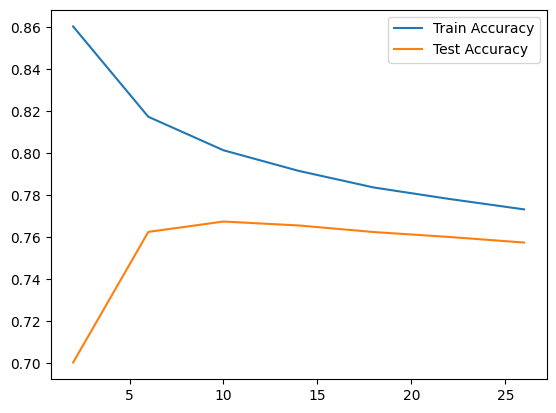

In [40]:
plt.plot(n_neighbors, train_score.values(), label="Train Accuracy")
plt.plot(n_neighbors, test_score.values(), label="Test Accuracy")

plt.legend()

#Best n_neighbors hyperparameter is around 10 with accuracy 0.77

In [41]:
y_train_s = y_train_s.map({'Single Family': 0, 'Condo': 1, 'Two Family': 2, 'Residential': 3,
       'Three Family': 4, 'Apartments': 5, 'Commercial': 6, 'Four Family': 7,
       'Industrial': 8})
y_test_s = y_test_s.map({'Single Family': 0, 'Condo': 1, 'Two Family': 2, 'Residential': 3,
       'Three Family': 4, 'Apartments': 5, 'Commercial': 6, 'Four Family': 7,
       'Industrial': 8})

In [42]:
XGB_model = Pipeline([('processor', processor), 
                ('model', XGBClassifier(learning_rate = 0.2, n_estimators = 1000, verbosity = 2))])

In [43]:
XGB_model.fit(X_train_s, y_train_s)

Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('num_col', StandardScaler(),
                                                  Index(['Assessed Value', 'Sale Amount', 'Sales Ratio', 'List Year'], dtype='object')),
                                                 ('cat_col',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Town'])])),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsampl...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=1000, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [44]:
pred_XGB = XGB_model.predict(X_test_s)

In [45]:
accuracy_score(y_test_s, pred_XGB)

0.7896333333333333

In [46]:
params = {
   'learning_rate': [0.3, 0.5],
   'n_estimators': [500, 2000, 3000],
   'max_depth': [5]}

In [47]:
gsearch = GridSearchCV(estimator=XGBClassifier(), param_grid = params, scoring ='accuracy', verbose = 2, cv = 3) 

In [48]:
XGB_grid_model = Pipeline([('processor', processor), 
                ('model', gsearch)])

In [49]:
XGB_grid_model.fit(X_train_s, y_train_s)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=500; total time=  11.2s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=500; total time=  10.8s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=500; total time=  11.7s
[CV] END ..learning_rate=0.3, max_depth=5, n_estimators=2000; total time=  50.9s
[CV] END ..learning_rate=0.3, max_depth=5, n_estimators=2000; total time= 1.0min
[CV] END ..learning_rate=0.3, max_depth=5, n_estimators=2000; total time= 1.0min
[CV] END ..learning_rate=0.3, max_depth=5, n_estimators=3000; total time= 1.6min
[CV] END ..learning_rate=0.3, max_depth=5, n_estimators=3000; total time= 1.6min
[CV] END ..learning_rate=0.3, max_depth=5, n_estimators=3000; total time= 1.6min
[CV] END ...learning_rate=0.5, max_depth=5, n_estimators=500; total time=  12.9s
[CV] END ...learning_rate=0.5, max_depth=5, n_estimators=500; total time=  11.8s
[CV] END ...learning_rate=0.5, max_depth=5, n_est

Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('num_col', StandardScaler(),
                                                  Index(['Assessed Value', 'Sale Amount', 'Sales Ratio', 'List Year'], dtype='object')),
                                                 ('cat_col',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Town'])])),
                ('model',
                 GridSearchCV(cv=3,
                              estimator=XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      co...
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...),
                              param_grid={'learning_rate': [0.3, 0.5],
                                          'max_depth': [5],
                                          'n_estimators': [500, 2000, 3000]},
                              scoring='accuracy', verbose=2))])

In [50]:
gsearch.best_params_

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 500}

In [51]:
final_pred = XGB_grid_model.predict(X_test_s)

In [52]:
accuracy_score(y_test_s, final_pred)

#XGB model is more accurate, and way quicker so this method will be used 

0.7930666666666667

In [54]:
df_valid = df.dropna(subset = 'Property Type')

In [55]:
df_null = df[df['Property Type'].isnull()==True]

In [56]:
df_null = df_null.drop('Property Type', axis=1)

In [57]:
values =  XGB_grid_model.predict(df_null)

In [58]:
values = pd.DataFrame(values, index=None, columns=['Property Type'])

In [59]:
values.reset_index(inplace = True, drop = True)

In [60]:
df_null.reset_index(inplace = True, drop = True)

In [61]:
df_changed = pd.concat([df_null, values], axis=1)

In [104]:
df_changed['Property Type'] = df_changed['Property Type'].map({0: 'Single Family', 1:'Condo', 2:'Two Family', 3:'Residential',
       4:'Three Family', 5:'Apartments', 6:'Commercial', 7:'Four Family',
       8:'Industrial'})

In [108]:
test_df = pd.concat([df_valid, df_changed], axis=0)

In [109]:
test_df.reset_index(drop=True, inplace = True)

In [110]:
df = test_df

In [111]:
df['Property Type'].value_counts()

Single Family    649333
Condo            215562
Residential       61135
Two Family        33526
Three Family      18988
Four Family        2618
Commercial         2141
Apartments          526
Industrial          229
Name: Property Type, dtype: int64

EDA

In [113]:
hp = df[['Sale Amount', 'Town', 'Property Type']].sort_values('Sale Amount', ascending = False)[:10]


In [114]:
#Thee is a bug in data base, appartment in Willington can't be worth 5b - so this is dropped (its not extreme it has to be a mistake)
hp.style.background_gradient(cmap = 'Reds')


,Sale Amount,Town,Property Type
56626,5000000000.000000,Willington,Apartments
972498,395500000.000000,Stamford,Single Family
972440,395500000.000000,Stamford,Single Family
969278,395500000.000000,Stamford,Single Family
969071,395500000.000000,Stamford,Single Family
971685,395500000.000000,Stamford,Single Family
972612,395500000.000000,Stamford,Single Family
972658,395500000.000000,Stamford,Single Family
971997,395500000.000000,Stamford,Single Family
970982,395500000.000000,Stamford,Single Family


In [115]:
#Dropping the inccorect value 
df = df.drop([56626])

In [116]:
df['Town'].value_counts()

Bridgeport       33777
Stamford         32380
Waterbury        27983
Norwalk          23783
New Haven        21226
                 ...  
Hartland           442
Scotland           418
Canaan             404
Union              246
***Unknown***        1
Name: Town, Length: 170, dtype: int64

Text(0.5, 0.91, 'Mean price in Town')

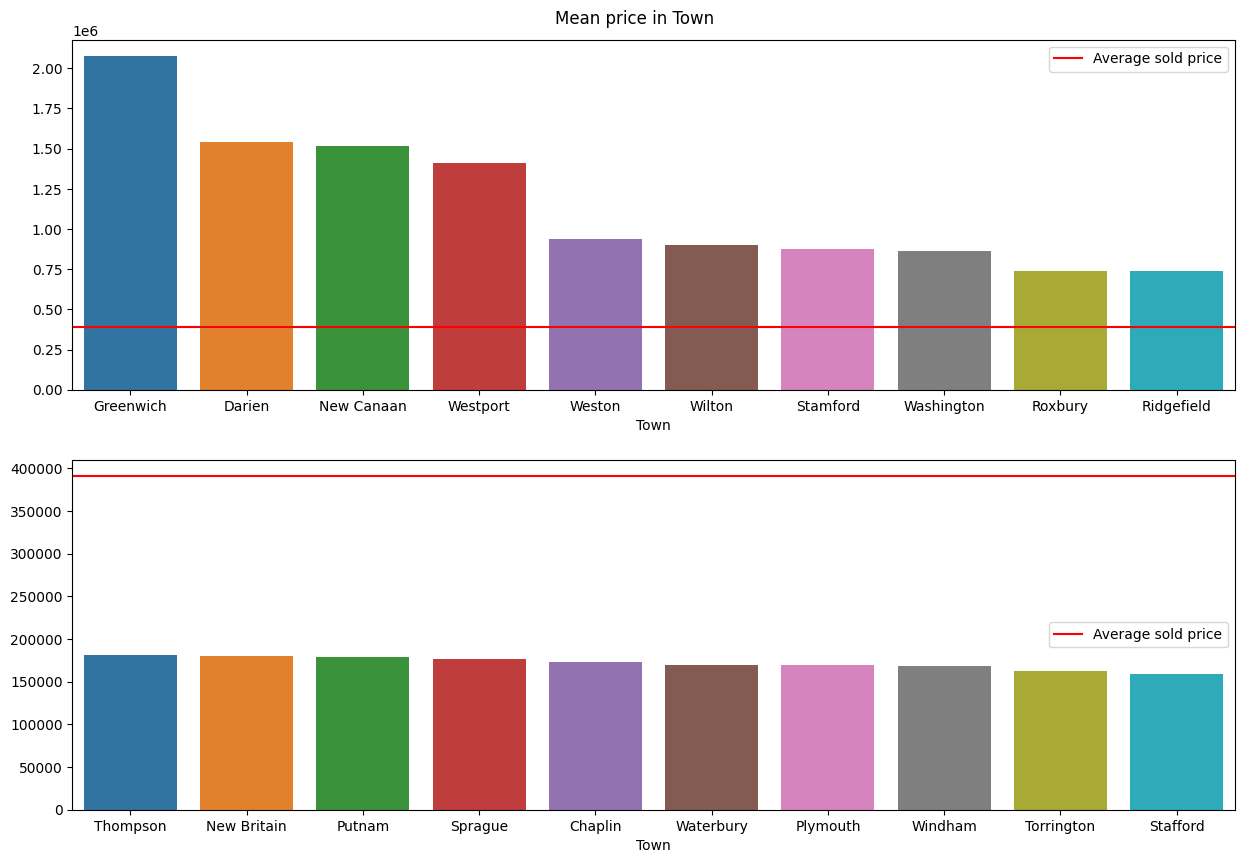

In [117]:
exp_towns = df.groupby('Town')['Sale Amount'].mean().sort_values(ascending = False)[:10]
cheap_town = df.groupby('Town')['Sale Amount'].mean().sort_values(ascending = False)[-10:]

fig, ax = plt.subplots(2, 1, figsize = (15,10))

sns.barplot(df, x = exp_towns.index, y=exp_towns.values, ax = ax[0]) 
sns.barplot(df, x = cheap_town.index, y = cheap_town.values, ax = ax[1]) 

ax[0].axhline(y = df['Sale Amount'].mean(), color = 'red', label = 'Average sold price')
ax[0].legend()
ax[1].axhline(y = df['Sale Amount'].mean(), color = 'red', label = 'Average sold price')
plt.legend()

plt.suptitle('Mean price in Town', y=0.91, )


Text(0.5, 0.91, 'Mean price base on type')

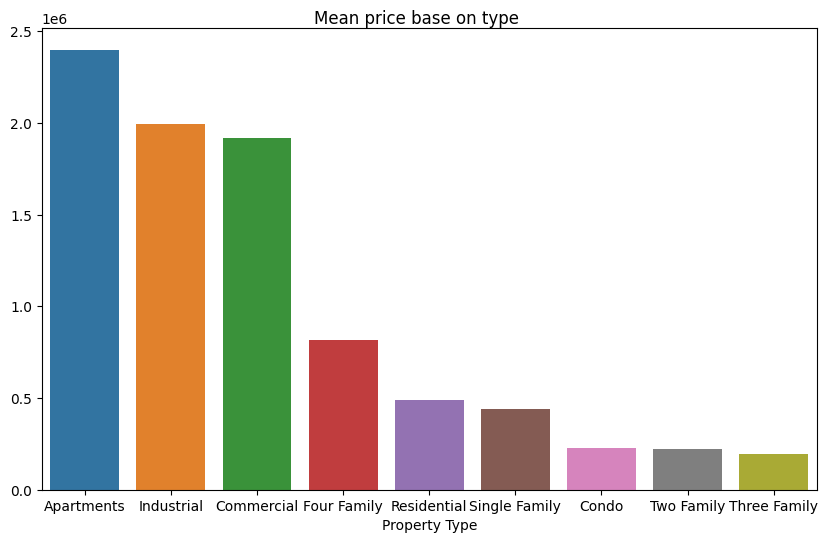

In [118]:
prop_type_mean = df.groupby('Property Type')['Sale Amount'].mean().sort_values(ascending = False)

plt.figure(figsize=(10,6))
sns.barplot(x = prop_type_mean.index, y = prop_type_mean.values)

plt.suptitle('Mean price base on type', y=0.91)

Text(0.5, 1.0, 'Waterbury')

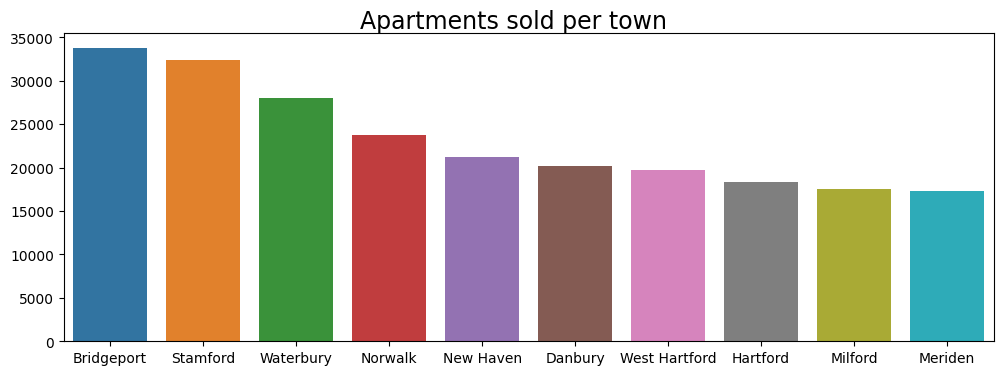

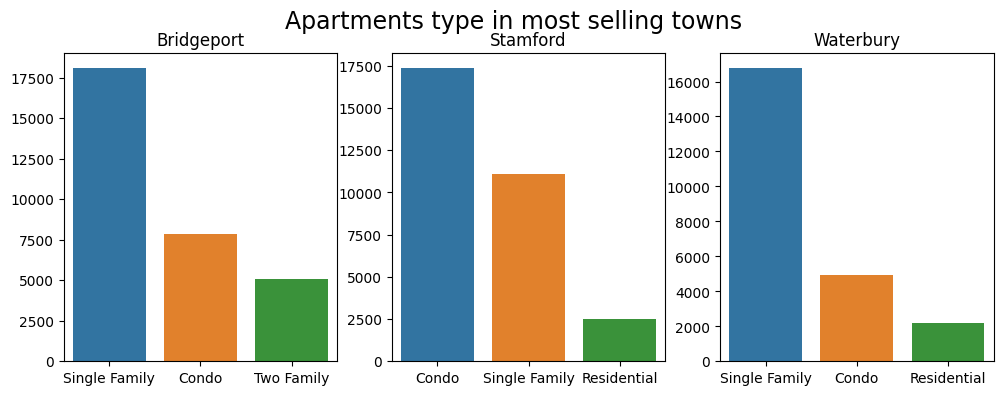

In [120]:
#Data set is to big for regular countplot, so I used value_counts function and then bar plot

bridgeport_type = df[df['Town'] == 'Bridgeport']['Property Type'].value_counts()[:3]
stamford_type = df[df['Town'] == 'Stamford']['Property Type'].value_counts()[:3]
waterbury_type = df[df['Town'] == 'Waterbury']['Property Type'].value_counts()[:3]

fig, ax = plt.subplots(1, 1, figsize=(12, 4))
htown = df.value_counts(subset='Town')[:10]
sns.barplot(x = htown.index, y = htown.values)
plt.suptitle('Apartments sold per town', y=0.94, fontsize = 17)
plt.xlabel('')

fig, ax = plt.subplots(1, 3, figsize=(12,4))
plt.suptitle('Apartments type in most selling towns', y=0.99, fontsize = 17)
type_list = [bridgeport_type, stamford_type, waterbury_type]

for  i, town  in enumerate(type_list):
    sns.barplot(df, x = town.index, y = town.values, ax = ax[i])
    
ax[0].set_title('Bridgeport')
ax[1].set_title('Stamford')
ax[2].set_title('Waterbury')


In [121]:
price_change = df.groupby('List Year')['Sale Amount'].mean()

Text(0.5, 0.93, 'Amount of properties sold per year')

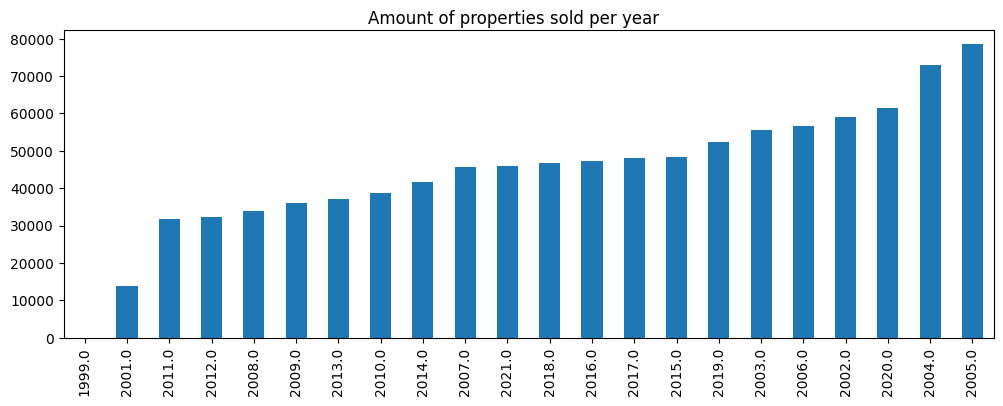

In [122]:
plt.figure(figsize = (12,4))
count = df['List Year'].value_counts().sort_values()
count.plot.bar()
plt.suptitle('Amount of properties sold per year', y=0.93)

Text(0.5, 0.98, 'Price change over time')

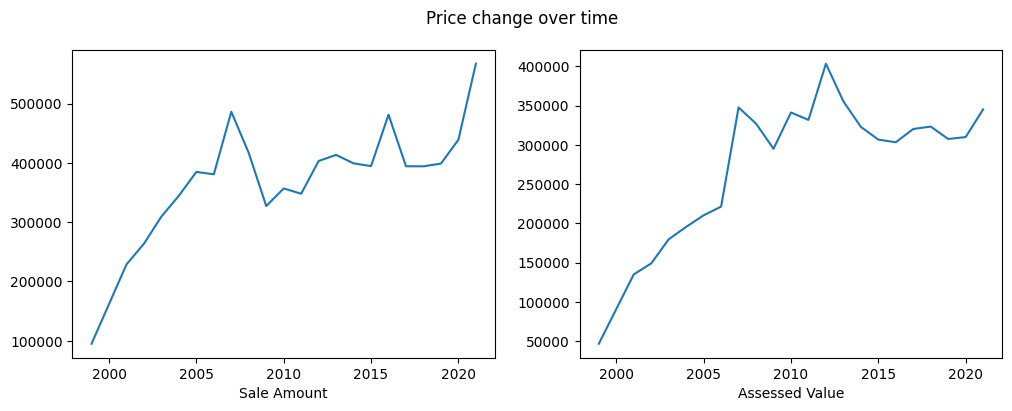

In [123]:
inflation = df.groupby('List Year')['Sale Amount'].mean()
inflation2 = df.groupby('List Year')['Assessed Value'].mean()

fig, ax = plt.subplots(1, 2, figsize = (12, 4))

plt.subplot(121)
plt.plot(inflation)
plt.xlabel('Sale Amount')

plt.subplot(122)
plt.plot(inflation2)
plt.xlabel('Assessed Value')

plt.suptitle('Price change over time')

In [124]:
df = df.drop('List Year', axis = 1) #This is involved in the date recorded tab and was necessary only for EDA

ML

In [125]:
#I thoguht assessed value will have much higher correlation with Sale Amount column, but its not, so the data can stay as is 
#*Assessed value is not computed based on Sale Amount.
#**Sale Ratio however is based on Sale amount so for the usefullnes and reality of the model has to be dropped
df = df.drop('Sales Ratio', axis = 1)
df.corr()[['Assessed Value', 'Sale Amount']] 

C:\Users\huber\AppData\Local\Temp\ipykernel_13468\4064898422.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()[['Assessed Value', 'Sale Amount']]


,Assessed Value,Sale Amount
Assessed Value,1.000000,0.313091
Sale Amount,0.313091,1.000000


In [126]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import ElasticNet



In [127]:
X = df.drop('Sale Amount', axis=1)
y = df['Sale Amount']

In [128]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [129]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=0)

In [130]:
X_train.shape, X_valid.shape, X_test.shape, y_test.shape

((708520, 4), (177131, 4), (98406, 4), (98406,))

In [131]:
cat_cols = list(df.select_dtypes('object').columns)
num_cols = list(df.select_dtypes(['int', 'float']).columns)

In [132]:
num_cols.remove('Sale Amount')

In [133]:
num_cols = ['Assessed Value']

In [134]:
num_cols

['Assessed Value']

In [135]:
cat_cols

['Town', 'Property Type']

In [136]:
t = [('num_cols', StandardScaler(), num_cols),
    ('cat_cols', OneHotEncoder(), cat_cols)]
processor = ColumnTransformer(t)

In [137]:
pipe_xgb = Pipeline([('processor', processor),
                     ('model', XGBRegressor())])

In [138]:
pipe_xgb.fit(X_train, y_train)

Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('num_cols', StandardScaler(),
                                                  ['Assessed Value']),
                                                 ('cat_cols', OneHotEncoder(),
                                                  ['Town', 'Property Type'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_catego...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [139]:
pred_xgb = pipe_xgb.predict(X_valid)

In [140]:
MSE_xgb = np.sqrt(mean_squared_error(y_valid, pred_xgb))
MAE_xgb = (mean_absolute_error(y_valid, pred_xgb))
                  

In [141]:
MSE_xgb

2058385.7428025252

In [142]:
MAE_xgb

146679.32147203566

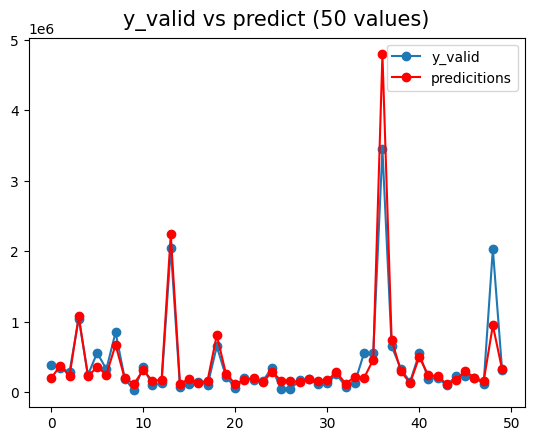

In [143]:
plt.plot(np.array(y_valid)[-50:],marker='o',label='y_valid')
plt.plot((pred_xgb)[-50:],marker='o',label='predicitions',color='red')
plt.title('y_valid vs predict (50 values)', size=15, y=1.01)
plt.legend()

In [144]:
from sklearn.model_selection import GridSearchCV

In [145]:
params = {
    'learning_rate': [0.1, 0.3],
    'n_estimators': [500, 2000],
    'max_depth': [4, 5]}

In [146]:
gsearch = GridSearchCV(estimator = XGBRegressor(), param_grid = params, cv = 3, verbose = 2)

In [147]:
pipe_grid = Pipeline([('processor', processor),
                     ('model', gsearch)])

In [148]:
pipe_grid.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=500; total time=   4.3s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=500; total time=   4.4s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=500; total time=   4.4s
[CV] END ..learning_rate=0.1, max_depth=4, n_estimators=2000; total time=  17.9s
[CV] END ..learning_rate=0.1, max_depth=4, n_estimators=2000; total time=  19.2s
[CV] END ..learning_rate=0.1, max_depth=4, n_estimators=2000; total time=  17.6s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=500; total time=   4.7s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=500; total time=   5.4s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=500; total time=   5.2s
[CV] END ..learning_rate=0.1, max_depth=5, n_estimators=2000; total time=  19.9s
[CV] END ..learning_rate=0.1, max_depth=5, n_estimators=2000; total time=  23.4s
[CV] END ..learning_rate=0.1, max_depth=5, n_esti

Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('num_cols', StandardScaler(),
                                                  ['Assessed Value']),
                                                 ('cat_cols', OneHotEncoder(),
                                                  ['Town', 'Property Type'])])),
                ('model',
                 GridSearchCV(cv=3,
                              estimator=XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stoppi...
                                                     max_bin=None,
                                                     max_cat_threshold=None,
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...),
                              param_grid={'learning_rate': [0.1, 0.3],
                                          'max_depth': [4, 5],
                                          'n_estimators': [500, 2000]},
                              verbose=2))])

In [149]:
gsearch.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}

In [150]:
params2 = {
    'learning_rate': [0.3, 0.5],
    'n_estimators': [200, 300, 500],
    'max_depth': [5, 6]}

In [151]:
gsearch2 = GridSearchCV(estimator = XGBRegressor(), param_grid = params2, cv = 3, verbose = 2)

In [152]:
pipe_grid2 = Pipeline([('processor', processor),
                     ('model', gsearch2)])

In [153]:
pipe_grid2.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=200; total time=   2.7s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=200; total time=   2.8s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=200; total time=   2.8s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=300; total time=   4.2s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=300; total time=   4.2s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=300; total time=   4.1s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=500; total time=   8.0s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=500; total time=   6.9s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=500; total time=   8.2s
[CV] END ...learning_rate=0.3, max_depth=6, n_estimators=200; total time=   3.8s
[CV] END ...learning_rate=0.3, max_depth=6, n_estimators=200; total time=   3.0s
[CV] END ...learning_rate=0.3, max_depth=6, n_es

Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('num_cols', StandardScaler(),
                                                  ['Assessed Value']),
                                                 ('cat_cols', OneHotEncoder(),
                                                  ['Town', 'Property Type'])])),
                ('model',
                 GridSearchCV(cv=3,
                              estimator=XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stoppi...
                                                     max_cat_threshold=None,
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...),
                              param_grid={'learning_rate': [0.3, 0.5],
                                          'max_depth': [5, 6],
                                          'n_estimators': [200, 300, 500]},
                              verbose=2))])

In [154]:
gsearch2.best_params_

{'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 200}

In [155]:
final_model = Pipeline([('processor', processor),
                     ('model', XGBRegressor(learning_rate = 0.3, max_depth = 5, n_estimators = 200))])

In [156]:
final_model.fit(X_train, y_train)

Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('num_cols', StandardScaler(),
                                                  ['Assessed Value']),
                                                 ('cat_cols', OneHotEncoder(),
                                                  ['Town', 'Property Type'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_catego...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.3,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [157]:
final_pred_xgb = final_model.predict(X_valid)

In [158]:
MSE_final = np.sqrt(mean_squared_error(y_valid, final_pred_xgb))
MAE_final = (mean_absolute_error(y_valid, final_pred_xgb))


In [159]:
MSE_final, MAE_final

(2057589.279298785, 146643.1644650014)

In [160]:
MSE_xgb, MAE_xgb

(2058385.7428025252, 146679.32147203566)

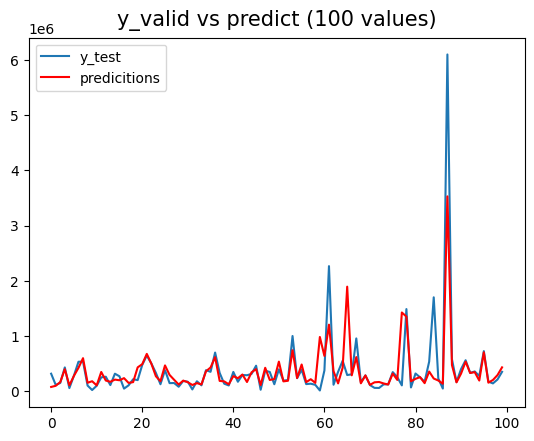

In [179]:
plt.plot(np.array(y_valid)[:100],label='y_test')
plt.plot((final_pred_xgb)[:100],label='predicitions',color='red')
plt.title('y_valid vs predict (100 values)', size=15, y=1.01)
plt.legend()

In [163]:
#Conclusion: model is generating quite well on average sale amount, considering that the set is huge and has a lot of outliners - that why extreme values are missing(even though its large) 
#model can be re-trained on agregated data such as each type of property is a separate model. 

